In [67]:
from smtplib import SMTPAuthenticationError
from statistics import LinearRegression

import yfinance as yf
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# predict stock prices using linear regression with technical indicators
# SMA, RSI, EMA

In [3]:
def get_data(ticker,period):
    data = yf.Ticker(f"{ticker}").history(period=period)
    return data


In [7]:
jpm = get_data("JPM","1y")
jpm

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-23 00:00:00-05:00,231.176252,233.673379,230.010919,233.448151,8611500,0.0,0.0
2024-12-24 00:00:00-05:00,234.466578,237.463157,234.114056,237.286880,3729100,0.0,0.0
2024-12-26 00:00:00-05:00,236.425112,238.217178,235.798380,238.099670,4451800,0.0,0.0
2024-12-27 00:00:00-05:00,237.688373,238.344482,235.063922,236.170502,5730200,0.0,0.0
2024-12-30 00:00:00-05:00,233.820270,235.847351,232.194678,234.358871,5723800,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-17 00:00:00-05:00,318.429993,319.369995,314.660004,314.980011,8718700,0.0,0.0
2025-12-18 00:00:00-05:00,316.000000,317.700012,312.220001,313.000000,11444900,0.0,0.0
2025-12-19 00:00:00-05:00,313.790009,318.559998,313.190002,317.209991,24494400,0.0,0.0


In [ ]:
jpm['Close'].ewm

In [30]:
def calc_RSI(inp):
    delta = inp["Close"].diff()
    gain = (delta.where(delta > 0,0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0,0)).rolling(window=14).mean()
    rs = gain/loss
    return 100 - (100/(1+rs))

In [35]:
def calc_indicators(inp):
    inp["SMA_20"] = inp["Close"].rolling(20).mean()
    inp["SMA_50"] = inp["Close"].rolling(50).mean()
    inp["RSI"] = calc_RSI(inp)
    inp["EMA"] = inp["Close"].ewm(span=20).mean()
    return inp

In [47]:
calc_RSI(jpm)
calc_indicators(jpm)
jpm=jpm.dropna()
jpm

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,EMA
Date,,,,,,,,,,,
2025-03-07 00:00:00-05:00,241.386612,242.853265,235.667672,238.482849,20498700,0.0,0.0,260.496350,254.126123,20.468275,255.403699
2025-03-10 00:00:00-04:00,232.507993,233.787606,225.115684,228.580521,18887200,0.0,0.0,258.351502,254.028770,13.165610,252.833507
2025-03-11 00:00:00-04:00,228.117893,229.663294,223.137198,225.548798,18143000,0.0,0.0,256.289335,253.794009,12.699126,250.220612
2025-03-12 00:00:00-04:00,230.332620,230.647612,223.698248,224.328217,16054000,0.0,0.0,253.971737,253.518580,15.243033,247.742353
2025-03-13 00:00:00-04:00,225.706277,225.903139,220.715729,221.660690,16467900,0.0,0.0,251.498122,253.228383,15.202281,245.247166
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-17 00:00:00-05:00,318.429993,319.369995,314.660004,314.980011,8718700,0.0,0.0,309.687000,307.277000,56.184708,311.821452
2025-12-18 00:00:00-05:00,316.000000,317.700012,312.220001,313.000000,11444900,0.0,0.0,310.173500,307.456400,49.928430,311.933695
2025-12-19 00:00:00-05:00,313.790009,318.559998,313.190002,317.209991,24494400,0.0,0.0,311.114999,307.689999,57.411039,312.436200


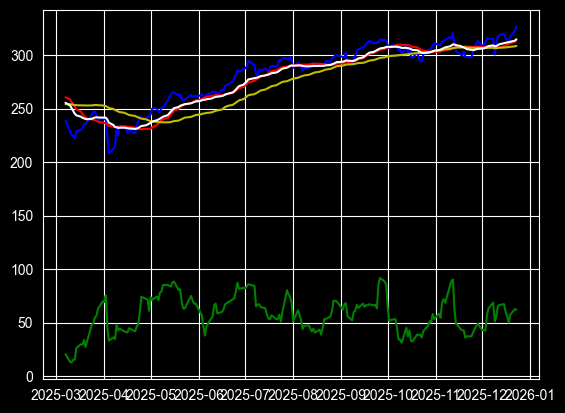

In [78]:
plot = plt.plot(jpm["Close"],'b',jpm["SMA_20"],'r',jpm["SMA_50"],'y',jpm["RSI"],'g',jpm["EMA"],'w')

In [48]:
indicator_columns = ["SMA_20","SMA_50","RSI","EMA"]
x = jpm[indicator_columns].values
y = jpm["Close"].values
y

array([238.48284912, 228.58052063, 225.54879761, 224.32821655,
       221.66069031, 228.79705811, 230.26370239, 231.28741455,
       235.36253357, 235.26409912, 237.8430481 , 244.17227173,
       247.19415283, 247.09571838, 244.23132324, 239.04393005,
       241.45553589, 239.8412323 , 241.96737671, 225.10583496,
       208.25930786, 212.3793335 , 214.78596497, 232.08808899,
       224.92756653, 233.93022156, 232.46443176, 230.88973999,
       227.40354919, 229.73097229, 226.789505  , 233.32608032,
       238.56524658, 242.28910828, 241.20959473, 240.88275146,
       242.26930237, 242.26930237, 244.51750183, 250.08348083,
       250.13301086, 246.85481262, 246.99346924, 251.03425598,
       250.64801025, 257.55102539, 260.48260498, 263.08734131,
       264.91952515, 264.98886108, 262.33462524, 263.12692261,
       258.53152466, 258.1651001 , 258.2046814 , 262.74069214,
       260.95797729, 261.82949829, 261.46307373, 262.11672974,
       263.71124268, 261.68096924, 259.43280029, 263.17

In [49]:
split_idx = int(len(x) * 0.8)
X_train, X_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [50]:
lr = sk.linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [62]:
MSE = ((y_test-y_pred) **2).mean()
MSE_lin = np.sqrt(MSE)
MSE_lin

np.float64(4.362669641230958)

In [65]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5,early_stopping_rounds=50)
model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=100)
y_pred_xg = model.predict(X_test)
MSE_xg = ((y_test-y_pred_xg) **2).mean()
MSE_xg = np.sqrt(MSE_xg)
MSE_xg

[0]	validation_0-rmse:37.29462
[100]	validation_0-rmse:20.68096
[200]	validation_0-rmse:13.94411
[300]	validation_0-rmse:11.65622
[400]	validation_0-rmse:10.68199
[500]	validation_0-rmse:10.26818
[600]	validation_0-rmse:10.08125
[700]	validation_0-rmse:9.95053
[800]	validation_0-rmse:9.90919
[900]	validation_0-rmse:9.90155
[902]	validation_0-rmse:9.90146


np.float64(9.900185515841988)

In [66]:
rforest = sk.ensemble.RandomForestRegressor(n_estimators=1000)
rforest.fit(X_train,y_train)
y_pred_rf = rforest.predict(X_test)
MSE_rf = ((y_test-y_pred_rf) **2).mean()
MSE_rf = np.sqrt(MSE_rf)
MSE_rf

np.float64(7.78787266217099)

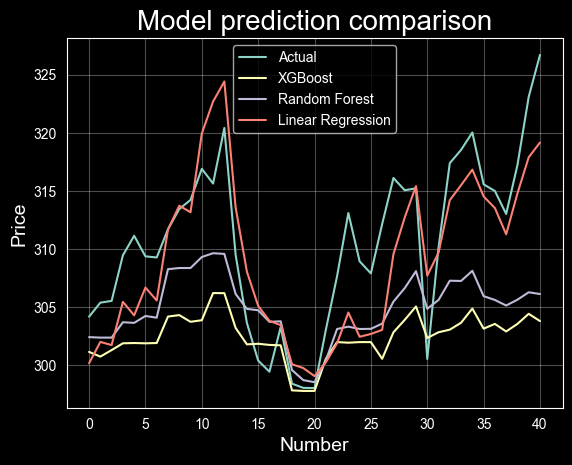

In [97]:
#plot_2 = plt.plot(y_test,'r',y_pred_rf,'b-.',y_pred_xg,'g:',y_pred,'w--')
fig,ax = plt.subplots()
ax.plot(y_test,label='Actual')
ax.plot(y_pred_xg,label='XGBoost')
ax.plot(y_pred_rf,label='Random Forest')
ax.plot(y_pred,label='Linear Regression')
ax.legend(loc='best',fontsize=10)
ax.grid(True,alpha=0.3)
ax.set_title('Model prediction comparison',fontsize=20)
ax.set_ylabel('Price',fontsize=14)
ax.set_xlabel('Number',fontsize=14)
plt.show()